# Hypothesis testing
## Terminology/Notation
Throughout I'll be denoting the probability distribution (or just probability, it should be clear from context) of some variable or value by $p(x)$.  For example, in the situation of flipping a coin three times, we might denote $p(HHH)$ for three heads, or $p(ccc)$ for the more general probability distribution over outcomes.

Conditional probabilities will show up a lot today, and will be denoted $p(x\,|\,y)$, where $x$ is our variable/value and y is some condition.

An example is the weather, which will be the focus of the exercises later.  If we look at the temperature high for a given day in San Jose, CA (I'm going to use F, since I'm American and my data is from US sources), call it $T_{H}$, we might ask any of the following, with the implied context we're extrapolating from data from 2016 (also, note that $T_L$ is the low temperature for a day):

- What is $p(T_{H})$?
- What is $p(T_{H}\,|\,$summer$)$?
- What is $p(T_{H}\,|\,$rainy day$)$?
- What is $p(T_{H}\,|\,T_{L} > 50)$?

These will all have quite different distributions - a general look at $T_{H}$ will be broad, but will tend to be warmer in the summer, and we'd suspect cooler on rainy days given San Jose's climate.  I just happened to bring the USGS weather data with me, so let's take a quick look as we'll be working with it today:

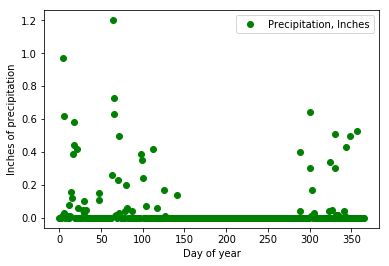

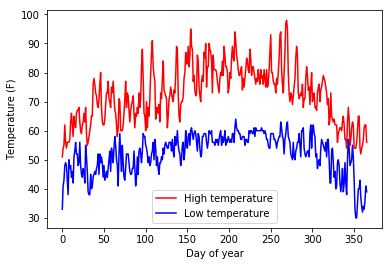

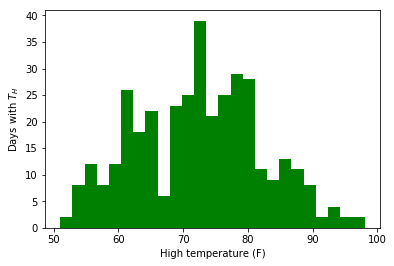

In [2]:
import matplotlib.pyplot as plt
import numpy as np

climate = np.genfromtxt('weatherSanJose.csv',delimiter=',',names=True,usecols=(4,5,6,8,9))

#Calling it with just y values makes it number them, in this case Jan 1 = 0, Dec 31 = 365 (it was a leap year)
plt.plot(climate[:]['PRCP'],'go')
plt.legend(['Precipitation, Inches'])
plt.xlabel('Day of year')
plt.ylabel('Inches of precipitation')
plt.show()
plt.plot(climate[:]['TMAX'],'r',climate[:]['TMIN'],'b')
plt.legend(['High temperature','Low temperature'])
plt.xlabel('Day of year')
plt.ylabel('Temperature (F)')
plt.show()

plt.hist(climate[:]['TMAX'],25,facecolor='g')
plt.xlabel('High temperature (F)')
plt.ylabel('Days with $T_{H}$')
plt.show()


## Frequentists and Bayesians
In discussing hypothesis testing, we'll be looking at two major schools of thought about probability/statistics: Frequentists and Bayesians.  They differ fundamentally in how they interpret $p(x)$ - what do we mean by a probability?

- The Frequentist interpretation is that if you repeated the measurement of $x$, this $p(x)$ is the distribution of values you'd measure.  The underlying values are *not* random, but our ability to measure them comes from random experiments.  A high probability means we are more likely to get that number from our experiment
- The Bayesian interpretation is that it is a measure of our knowledge/ignorance, a sort of "betting man's odds".  A high probability means that the value is more likely to be that, given what we know, and we can treat the underly values as random variables, since "random" means "thing we don't have complete knowledge of" now

These two interpretations lead directly to different ways of thinking about things, and thus to different methodology (though the methods of one can and are used by the other, since they both describe the same mathematics).

## Hypothesis Testing
Coming from the Frequentists viewpoint, we are measuring outcomes of repeatable experiments - we're going to be sampling some data from the world, and using that to extract information.  Our sampling is (hopefully) random, so if we were to start from scratch (including data collection) each time we'd get something different.  Note that the following all make sense from a Bayesian point of view as well, but the interpretation is slightly different.

All of this will be centered around the idea of Hypotheses: we have some statement about the world/data we are trying to prove, call it $H_a$, and a base assumption we are measuring against, call it $H_0$.  As an example, we might suspect an average is higher than some standard, so $H_a = (\mu > \mu_0)$, with $H_0 = (\mu <= \mu_0)$ or $H_0 = (\mu = \mu_0)$, which can be treated similarly.  In this example, our "test statistic" is $\mu$ - it's the thing that we're statistically analyzing.  This test will depend on our assumption about what the underlying distributions look like, as we'll see in a moment.

### p-values
At its most basic, a p-value is the probability that, assuming $H_0$ is true, we would measure a value at least as inconsistent with $H_0$ as the one we obtained.  Hence, it's a measure of how strongly we can rejet $H_0$ in favor of $H_a$, dependent on our model of $H_0$.  This is directly related to the statistical significance of a result, and the terms are sometimes used interchangably.

As a simple example, if we have a normal distribution with $\mu=1$ and $\sigma=2$, and we see a value of $-3$, we'd look at:


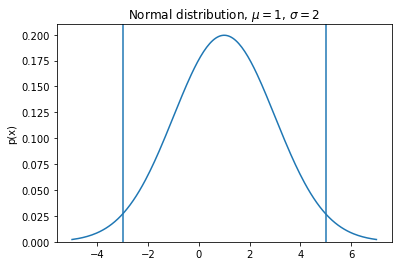

In [3]:
from scipy.stats import norm

norm12 = norm(loc = 1, scale = 2)
x = np.linspace(-5,7,200)
plt.plot(x,norm12.pdf(x))
plt.ylabel('p(x)')
plt.title('Normal distribution, $\mu=1$, $\sigma=2$')
plt.ylim([0,0.21])
xposition = [-3, 5]
plt.axvline(xposition[0])
plt.axvline(xposition[1])
plt.show()

To illustrate, let's decide if 2016 was a "normal" year.  Given the data we have on hand ($T_{H}$, $T_{L}$, precipitation) suggests we start simple: do these values match up with long term averages? Wikipedia claims the following:
- Long term high temperature average: 70.7 F
- Long term low temperature average: 50.3 F
- Number of rainy days: 61.9
- Average annual rainfall: 15.82 inches

Let's look at the temperature averages.  We'll make some simplifying assumptions to make this more tractable:
- Our 366 day sample can be treated as a "random" sample (we'll pretend the seasonal variation isn't important)
- Our sample is big enough to invoke the Central Limit Theorem, so our average is normally distributed

#### Exercise 1
Compute the averages of high and low temperature, and compute the p-value for rejecting the $H_0$ that these averages equal the long term averages (treat them individually as $T_H$ and $T_L$, so you'll get two p-values).  Assume the CLT holds, so the average is normally distributed with $\sigma^2 = s^2/n$ with $s^2$ the sample variance.  Note that our $H_0 = (\bar{T} = T_{long})$ and $H_a = (\bar{T} \neq T_{long})$, so we're looking at both high and low flucuations.  Technically we should use a t-distribution, but the difference will be very small here.  



### t-tests
T-tests are based around Student's t-distribution.  This is much like a normal distribution, but with heavier "tails" (so extreme values are more likely), and arises when we use the sample variance in place of the true variance, as we just did.  There is a family of these distributions depending on the degrees of freedom in the problem $\nu$, becoming more like the normal distribution as $\nu$ increases.  At the $\nu = n-1 = 365$ we assumed in the exercise, the difference is marginal.  We technically just did a one-population t-test, with our test statistic $t = (\bar{T} - T_{long})/(s/\sqrt{n})$.  This can be directly mapped to a p-value from a table (which integrates the t-distribution), given $t$ and $\nu$, or using scipy.stats.t

There also exist more interesting t-tests for comparing the means of two samples, which are simple extensions of this.  The new t-statistic to use is
$$t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$
Effectively, this measures the differences between populations versus the differences within populations.  Getting the right $\nu$ is a little more complicated, but thankfully it's already implemented for us at scipy.stats.ttest_rel

#### Exercise 2

Go ahead and use this to answer one of our original questions - do we see a statistical difference in the temperatures of rainy days versus dry days?  You'll want to plot the histogram of precipitation to decide where your cutoff is (a log scale on the axis may be helpful).  You'll also want to use python's filter function separate out the days